<a href="https://colab.research.google.com/github/chebbin/datasci_4_web_viz/blob/main/hha507hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Fetch the data

df = pd.read_csv('/content/data_florida.csv')
df.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'LocationName', 'DataSource',
       'Category', 'Measure', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopulation',
       'LocationID', 'CategoryID', 'MeasureId', 'DataValueTypeID',
       'Short_Question_Text', 'Geolocation', 'Counties'],
      dtype='object')

In [17]:
# Filter for 'SLEEP' as measured and 'Age-adjusted prevalence' as data_value_type

df = df[(df['MeasureId'] == 'SLEEP') & (df['Data_Value_Type'] == 'Age-adjusted prevalence')]
df

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation,Counties
22,2020,FL,Florida,Escambia,BRFSS,Health Risk Behaviors,Sleeping less than 7 hours among adults aged >...,%,Age-adjusted prevalence,36.5,...,35.2,37.8,322390,12033,RISKBEH,SLEEP,AgeAdjPrv,Sleep <7 hours,POINT (-87.3203222 30.5299979),43.0
63,2020,FL,Florida,St. Johns,BRFSS,Health Risk Behaviors,Sleeping less than 7 hours among adults aged >...,%,Age-adjusted prevalence,31.0,...,29.4,32.5,292466,12109,RISKBEH,SLEEP,AgeAdjPrv,Sleep <7 hours,POINT (-81.4000404 29.8904875),1083.0
76,2020,FL,Florida,Pasco,BRFSS,Health Risk Behaviors,Sleeping less than 7 hours among adults aged >...,%,Age-adjusted prevalence,34.8,...,33.3,36.0,584067,12101,RISKBEH,SLEEP,AgeAdjPrv,Sleep <7 hours,POINT (-82.5110062 28.3098227),1080.0
85,2020,FL,Florida,Polk,BRFSS,Health Risk Behaviors,Sleeping less than 7 hours among adults aged >...,%,Age-adjusted prevalence,34.7,...,33.6,35.8,753520,12105,RISKBEH,SLEEP,AgeAdjPrv,Sleep <7 hours,POINT (-81.6935336 27.9536488),1082.0
115,2020,FL,Florida,Gilchrist,BRFSS,Health Risk Behaviors,Sleeping less than 7 hours among adults aged >...,%,Age-adjusted prevalence,36.5,...,34.9,38.0,18360,12041,RISKBEH,SLEEP,AgeAdjPrv,Sleep <7 hours,POINT (-82.7958011 29.7234556),44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,2020,FL,Florida,Union,BRFSS,Health Risk Behaviors,Sleeping less than 7 hours among adults aged >...,%,Age-adjusted prevalence,40.1,...,38.7,41.4,16335,12125,RISKBEH,SLEEP,AgeAdjPrv,Sleep <7 hours,POINT (-82.366918 30.0542796),1090.0
982,2020,FL,Florida,Holmes,BRFSS,Health Risk Behaviors,Sleeping less than 7 hours among adults aged >...,%,Age-adjusted prevalence,37.6,...,36.0,39.0,19784,12059,RISKBEH,SLEEP,AgeAdjPrv,Sleep <7 hours,POINT (-85.8159385 30.8620072),1108.0
1003,2020,FL,Florida,Hendry,BRFSS,Health Risk Behaviors,Sleeping less than 7 hours among adults aged >...,%,Age-adjusted prevalence,35.6,...,34.5,36.6,40313,12051,RISKBEH,SLEEP,AgeAdjPrv,Sleep <7 hours,POINT (-81.1521142 26.539967),1105.0
1021,2020,FL,Florida,Highlands,BRFSS,Health Risk Behaviors,Sleeping less than 7 hours among adults aged >...,%,Age-adjusted prevalence,38.3,...,37.2,39.6,103296,12055,RISKBEH,SLEEP,AgeAdjPrv,Sleep <7 hours,POINT (-81.3423534 27.3410799),46.0


In [16]:
# Group by 'LocationName' and get the average (or sum) 'Data_Value'
grouped = df.groupby('LocationName').Data_Value.mean().sort_values(ascending=False)
grouped

LocationName
Hamilton     42.1
Taylor       41.0
Madison      40.3
Union        40.1
Bradford     40.0
             ... 
Alachua      32.9
Lee          32.1
Nassau       31.7
Collier      31.6
St. Johns    31.0
Name: Data_Value, Length: 67, dtype: float64

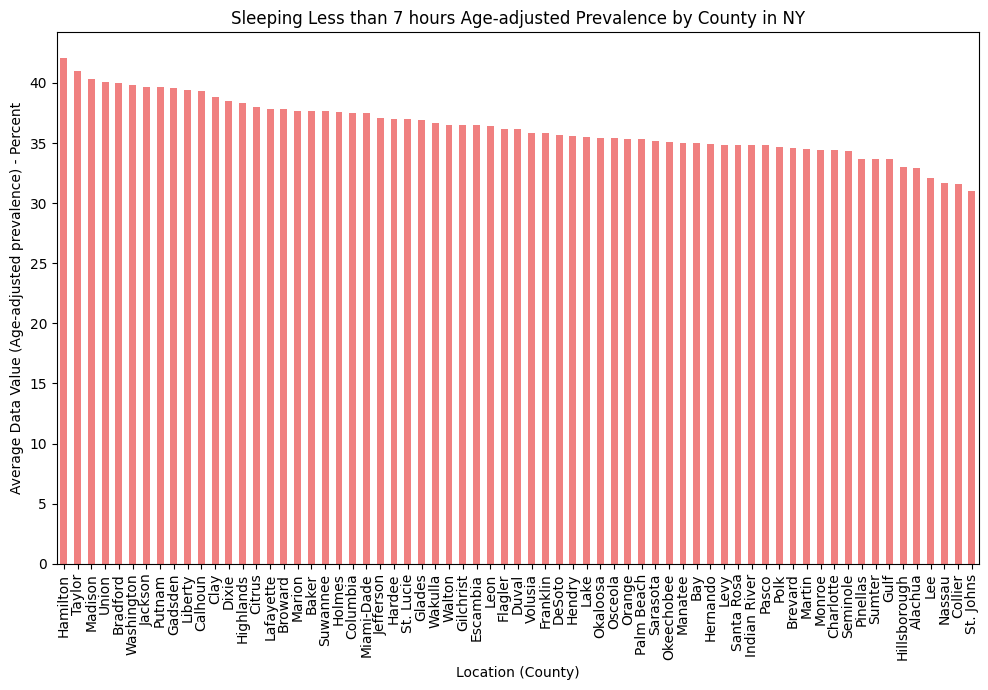

In [18]:
# Plotting
plt.figure(figsize=(10, 7))
grouped.plot(kind='bar', color='lightcoral')
plt.ylabel('Average Data Value (Age-adjusted prevalence) - Percent')
plt.xlabel('Location (County)')
plt.title('Sleeping Less than 7 hours Age-adjusted Prevalence by County in NY')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("sleep_per_location.png")  # Saving the plot as an image
plt.show()

In [19]:
import ipywidgets as widgets

# Compute the average data value across all counties
avg_data_value = df['Data_Value'].mean()

# Sort the counties in ascending order for the dropdown list
sorted_counties = sorted(df['LocationName'].unique())

# Interactive selection of county for visualization using ipywidgets
@widgets.interact(County=sorted_counties)
def plot_data(County):
    county_value = df[df['LocationName'] == County]['Data_Value'].values[0]

    # Labels for bars
    labels = [County, 'Average across all counties']

    # Data values for bars
    values = [county_value, avg_data_value]

    plt.figure(figsize=(8, 6))

    # Plot the bars
    colors = ['lightcoral', 'lightblue']
    plt.bar(labels, values, color=colors)

    plt.ylabel('Data Value (Age-adjusted prevalence) - Percent')
    plt.title(f'Sleeping Less than 7 Hours Age-adjusted Prevalence in {County} vs Average across all counties')

    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='County', options=('Alachua', 'Baker', 'Bay', 'Bradford', 'Brevard'…